In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
from time import time
matplotlib.rcParams['text.usetex'] = True
plt.rc('font', family='serif')
plt.rc('text', usetex=True)

In [23]:
def pi_estimation(N,plot=False):

    # Creo mis variables aleatorias de una dist uniforme
    x = np.random.uniform(low=0,high=1,size=[N,1])
    y = np.random.uniform(low=0,high=1,size=[N,1])

    inside_circ = np.sqrt(x**2 + y**2) <= 1

    approx_pi = 4*np.sum(inside_circ)/N
    
    if plot == True:
        x_in = x[inside_circ]
        y_in = y[inside_circ]
        
        plt.figure(figsize=[12,12],dpi=300)
        fig, ax = plt.subplots(1,1)
        plt.scatter(x,y,s=0.5)
        plt.scatter(x_in,y_in,color='red',s=0.5)

        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.xlabel(r'x')
        plt.ylabel(r'y')

        plt.xticks([0,0.5,1])
        plt.yticks([0,0.5,1])
        plt.title('$N = {}$ -- $\pi_e = {}$'.format(N,approx_pi))

        ax.set_aspect('equal')

        plt.savefig('pi'+str(N)+'.png',bbox_inches="tight",dpi=300)
    
    return approx_pi

3.14028

<Figure size 3600x3600 with 0 Axes>

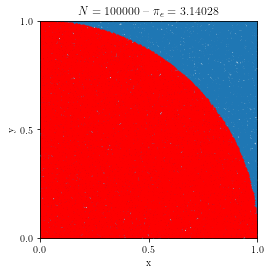

In [24]:
N = 100000

pi_estimation(N,plot=True)

In [21]:
def pi_estimation_polar(N,plot=False):

    r  = np.random.uniform(low=0,high=np.sqrt(2.0),size=[N,1])
    th = np.random.uniform(low=0,high=np.pi/2.0,size=[N,1])

    x = r * np.cos(th)
    y = r * np.sin(th)
    
    inside_circ = r <= 1

    approx_pi = 4*np.sum(inside_circ)/N
    
    if plot == True:
        x_in = x[inside_circ]
        y_in = y[inside_circ]
        
        plt.figure(figsize=[12,12],dpi=300)
        fig, ax = plt.subplots(1,1)
        plt.scatter(x,y,s=0.5)
        plt.scatter(x_in,y_in,color='red',s=0.5)

        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.xlabel(r'x')
        plt.ylabel(r'y')

        plt.xticks([0,0.5,1])
        plt.yticks([0,0.5,1])
        plt.title('$N = {}$ -- $\pi_e = {}$'.format(N,approx_pi))

        ax.set_aspect('equal')

        plt.savefig('pi'+str(N)+'.png',bbox_inches="tight",dpi=300)
    
    return approx_pi

2.8012

<Figure size 3600x3600 with 0 Axes>

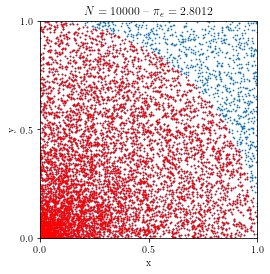

In [5]:
N = 10000

pi_estimation_polar(N,plot=True)

In [8]:
def error_estimate(n,plot=False):
    t_init = time()
    error = []

    n = np.around(n).astype(int)

    for i in n:
        count = 0
    
        est_pi = pi_estimation(i)
    
        error.append(np.abs(1 - est_pi/np.pi))
        
    t_final = time()

    Time = t_final - t_init
 
    print('El tiempo de ejecución del programa fue ',Time,' segundos')

    # Graficamos el error
    if plot == True:
        plt.figure(figsize=(12,12),dpi=300)
        fig, ax = plt.subplots(1,1)
        plt.plot(np.log10(N)/np.log10(2),np.log10(error),'o-')
        plt.plot(np.log10(N)/np.log10(2),np.log10(0.2/N**0.5),label='$1/\sqrt{N}$')
        plt.xticks(np.log(N)/np.log(2), rotation=0)
        plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('$2^{%.0f}$')) 
        plt.xlabel('Número de tiros $(N)$')
        plt.ylabel('Error $(\log|1 - \pi_\mathrm{MC}/\pi|)$')
        plt.grid(True)
        ax.legend()
        plt.savefig('error.png',bbox_inches="tight",dpi=300)

El tiempo de ejecución del programa fue  0.06800627708435059  segundos


<Figure size 3600x3600 with 0 Axes>

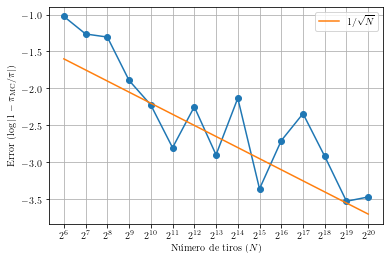

In [9]:
N = np.logspace(6,20,num=15,base=2,endpoint=True)
error_estimate(N,plot=True)

# The math of the problem

We want to focus in all the points $(x_i,y_i)$ that are inside the unit circle. In our case we are only considering one quarter of the hole circle, but is the same.

We can just consider one coordinate, lets say $x_i$, and use it as our random variable. So, from our problem we want to focus in all the points that follows the relation:
\begin{equation}
    y_i \leq \sqrt{1 - x_i^2}.
\end{equation}

The 

The numerical error of the MC method follows the relation:
\begin{equation}
    error \propto \frac{1}{\sqrt{N}},
\end{equation}

which agrees with the proven value of the standard deviation for the MC method:
\begin{equation}
    \sigma \approx \frac{1}{\sqrt{N}},
\end{equation}